# Multiple Linear Regression and Regression Error Metrics¶

Why do we call it multipl linear regression? --> Because we increase the number of features or factors that affect the target variable
as we have multiple features
- y = b0 + b1X1 + b2X2 + b3X3 + .... bnXn

## Import Library

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 4)

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

## Read Data Set

In [3]:
df = pd.read_csv('Advertising.csv')
df
# sales --> target, label, dependent variable
# other columns --> features, attributes, independent variable

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data Preparation -  EDA

In [4]:
df.shape

(200, 4)

In [5]:
df.info()
# it is a clean dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull()

,TV,radio,newspaper,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
# !pip install missingno
# visualizes the structure and distribution of missing or null data

In [9]:
import missingno as msno
# missingno --> library
# msno --< module

<Axes: >

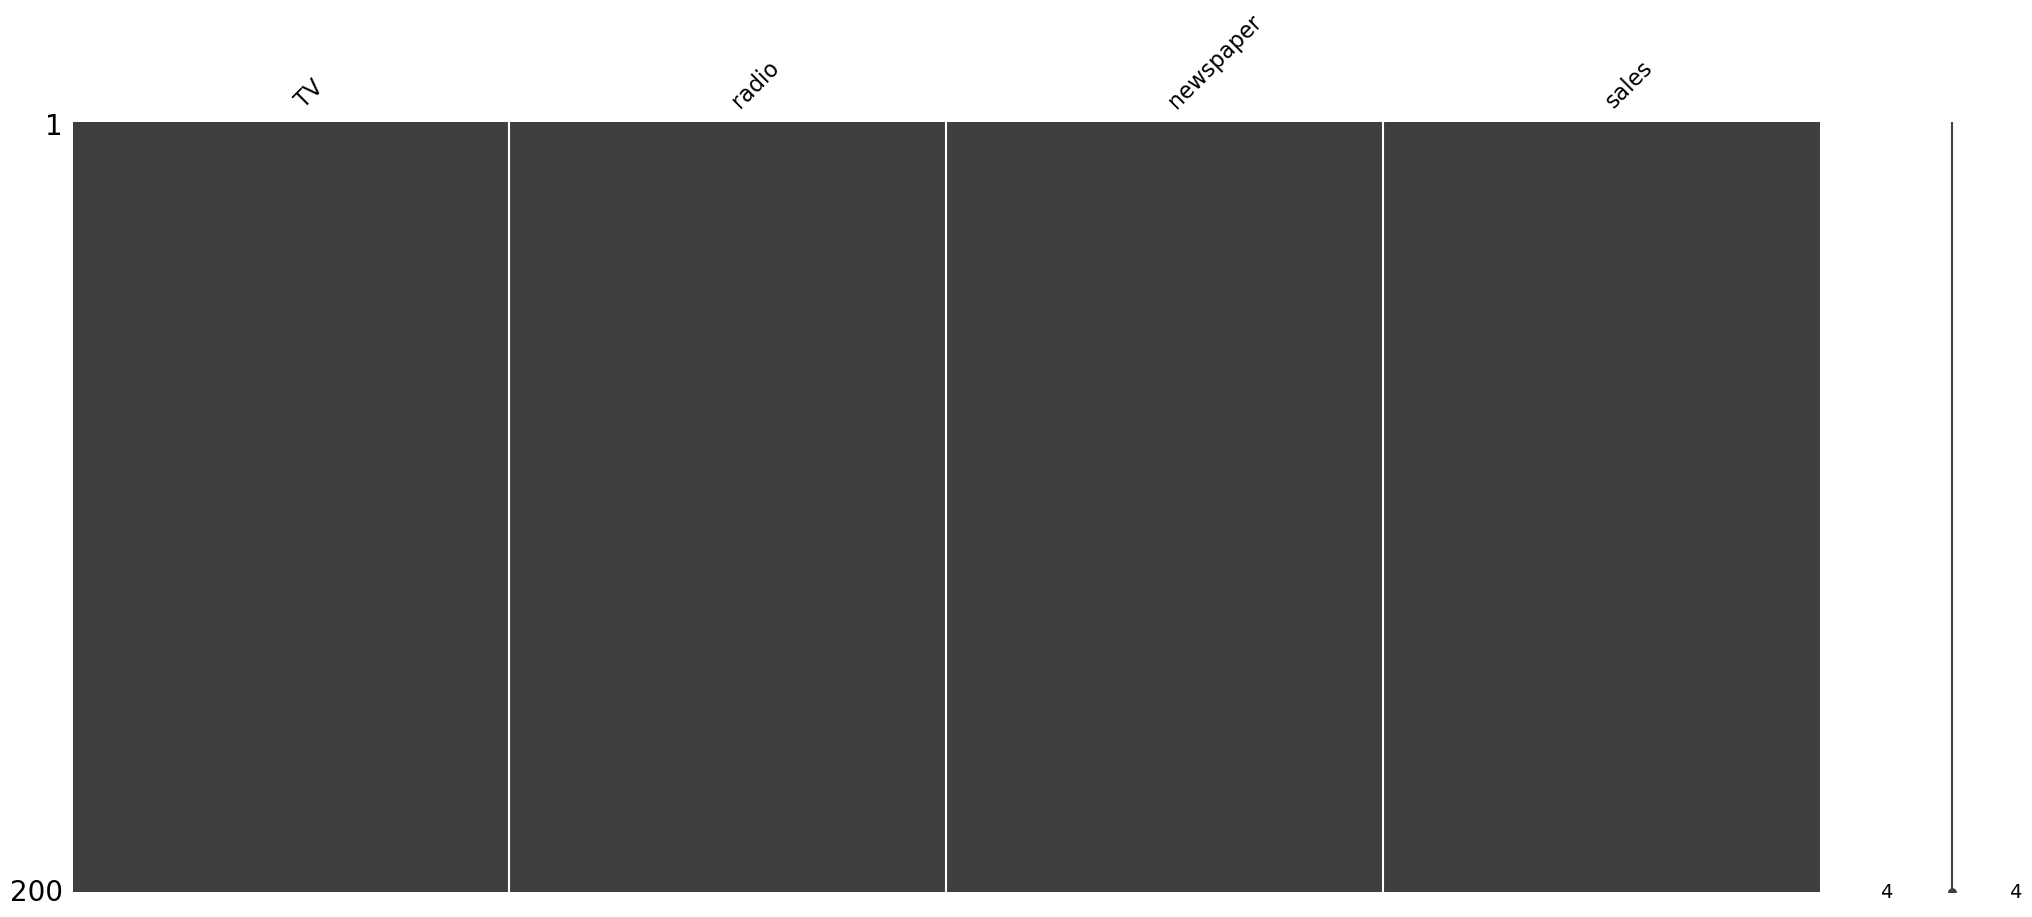

In [10]:
msno.matrix(df)

In [11]:
# the following is an example of an image with null cells or values(which is taken from another dataset)
# here, the white lines represent null value

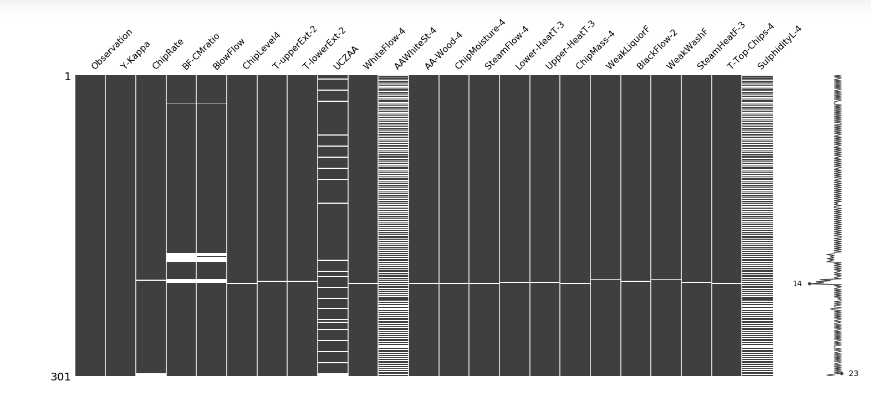

In [12]:
df.sort_values(by = 'sales', ascending=False)

,TV,radio,newspaper,sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
...,...,...,...,...
108,13.1,0.4,25.6,5.3
78,5.4,29.9,9.4,5.3
8,8.6,2.1,1.0,4.8
155,4.1,11.6,5.7,3.2


In [13]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
# !pip install summarytools

In [15]:
from summarytools import dfSummary

In [16]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,TV[float64],Mean (sd) : 147.0 (85.9)min < med < max:0.7 < 149.8 < 296.4IQR (CV) : 144.4 (1.7),190 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACoUlEQVR4nO3cTY6iQBiA4a+G1qAmEGOiOy8wySxceog57BxhFp7AG7gzMQQj3UQEZjW7bn+qQOurfp91Q2N4Q9cPtmnbVgDf/Xj1BQD3eLv1A8aYkYgMLc9/btv2w/JYWAj1fl0N1Rgzms1mv5Mkmdqc/Hg8ZsaYP75++NCEfL9uPVGHSZJM1+v1R5qm5SMnzvM83mw208PhMBQR7z54oIK9Xzf/9IuIpGlazufzd4vzjyyOgaMQ7xeTKahAqFCBUKECoUIFQoUKhAoVCBUq3LWOiudx3AJNmqYZdHk9viBUj7hugVZVFdd1/bMsy78iYrPg7y2vQw31BYsrrLdARUR2u910u92OL5dL1MfFvZK3oYb8gsUttlugWZZ5uwXqyttQJeAXLPA4n0MVkTBfsPBVXdcDEUmMMban6G245X2oeI6iKAZVVf1aLpdRFEUPj49F+h1uEeoXvttE7nw+v8VxPF6tVuViscgePb7v4RahfuI7T+Qmk4ntUEukx+EWoX6OiZxngg3VcWKQNE0zSNM0YyLnhyBDdZ0YhLzDo1WQobpODFx3eBye5sHu1bsKMtT/bCcGLjs8Lk9znuRfCzrUV3B5moe8V++KUHti8zTXvlfvOIG9uvZMqOiE6wT21tozoaITLkOee9aeew21i7XMji8JPXPY2bo67OktVNYy0aXeQn31WibC0vsY9RVrmQgPX5eGCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChXu+tfoeZ7Hj574dDrFIiJFUcT7/X78zOO1/m6t1+16/D19/QMrB7y1WUnQAQAAAABJRU5ErkJggg=="">",0(0.0%)
2,radio[float64],Mean (sd) : 23.3 (14.8)min < med < max:0.0 < 22.9 < 49.6IQR (CV) : 26.5 (1.6),167 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACsElEQVR4nO3cPW/aQBjA8ecggHmRLYQKG0vHSh088iH6YfsRMvAJMmTpxIaELBBuEMZ2l6ZLWsB3vsSP+//N8YtO/8R3p1NMWZYCNF3no18AuMfDrR8wxgxFpG95/3NZli+W1wJ/XA3VGDOczWbfwjCc2tz8cDgkxpjvxApXt/6i9sMwnK5Wq5coik5Vbrzf74P1ej3d7XZ9ESFUOLn56RcRiaLoNJ/Pf1rcf2hxDfAGiymoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQoW7DqWgGs7w1o9Qa8YZXj8ItX6c4fWAUD3hDG+9Gh0qc73qHMesIyKFw+O9jXljQ2WuV53LmOV53kvT9PNkMvnR6XQym+f7HPPGhirM9WxYj9lms5k+PT19iuP4ebFYJFUf7HvMvYaa53lPREJjjM3lYVEUvSiKEuZ61djMj5MkGYqIjMdj27m1iMcx9xZqmqa9LMu+LpfLbrfbrfTbLSKSZVmQ5/mX0+n0KCK2A4eW8Bbq+Xx+CIJgFMfxyeZT8vtTNLpcLl0f7wddvM9RbT8lr58iQKTZi6kP5bDNExZF0av7ff53hPoXLts8zK39aG2orjsOk8lkvlqtDpbbPMyta9bKUOvacRgMBo+22zyoVytDZcehfVoZ6it2HNqDE/5QodV/UfG+HBewV09eESpq4bqAvXXyilAbpo6DPDW/0l1cFrD3nLwi1AZpw0Eeh9NXVxewhNogbKv9G6E2ENtqb7E9BRUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlS4639P7ff7oOqNj8djICKSpmmw3W5H73m91mdrfW/X6+/p6xfCCaHWusjxaAAAAABJRU5ErkJggg=="">",0(0.0%)
3,newspaper[float64],Mean (sd) : 30.6 (21.8)min < med < max:0.3 < 25.8 < 114.0IQR (CV) : 32.4 (1.4),172 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACY0lEQVR4nO3cPY7aQBiA4W/MgsyCbCEi6GjSp6DkEDlsroDELXIBJGtlxMQI5DhNiCItC3jGTuYbvU+9YyhemZ0f2zRNI0Dokv/9BYBnvDz6A2PMWERGjtc/N01TOY4F/rgbqjFmPJ/Pv2ZZNnO5+OFweDPGfCNW+Hp0Rx1lWTbbbDZVnuenNhcuyzLd7XazoihGIkKo8PLwp19EJM/z02Kx+OFw/bHDGOAdJlNQgVChAqFCBUKFCoQKFZ6a9buq63ooIpkxxvUSbBhARHoM1Vo7vFwuX1ar1WAwGLRag71iwwBXvYV6Pp9f0jR9Xa/Xp+Vy+dZ2PBsG+FuvP/0iIpPJxHWzQIQNA/zGZAoqECpUIFSoQKhQoffJlA/PdVjWYCMSbKi+67CswcYl2FB91mFZg41PsKFeeazDsgYbESZTUIFQoQKhQoXg/0d1xRHDuEQZKkcM4xNlqBwxjE+UoV5xxDAeTKagAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoULUO1M+eF4rLIR6A89rhYdQb+B5rfAQ6h08rxUOJlNQgVChAqFCBUKFCoQKFQgVKhAqVCBUqMCCfw84J9A9Qu0Y5wT6Qagd45xAPwi1J5wT6BaTKajAHTUwvIXwNkINCG8h/BihBoS3EH6MUAPEWwjfYzIFFQgVKhAqVCBUqECoUIFQoQLLU5GJ9YghoUYk5iOGhBoR3yOG2+12URTFJ2PMwfErJCLy03Hs3bv5U6GWZZm2/dTj8ZiKiFhr0/1+//ovx2v97K6+t4uqqrzuxnVdD621n6fT6fckSS5txz+6m/8CVzmUDQaXxEgAAAAASUVORK5CYII="">",0(0.0%)
4,sales[float64],Mean (sd) : 14.0 (5.2)min < med < max:1.6 < 12.9 < 27.0IQR (CV) : 7.0 (2.7),121 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2F

In [17]:
# an example of the importance of the closeness of mean or average with standard deviation or std values 
# in outlier detection
print(np.mean([100, 110, 120, 115]))
print(np.std([100, 110, 120, 115]))

111.25
7.39509972887452


In [18]:
print(np.mean([100, 110, 120, 700]))
print(np.std([100, 110, 120, 700]))

257.5
255.57533136044253


In [19]:
print(np.mean([100, 110, 120, 900]))
print(np.std([100, 110, 120, 900]))

307.5
342.153109002388


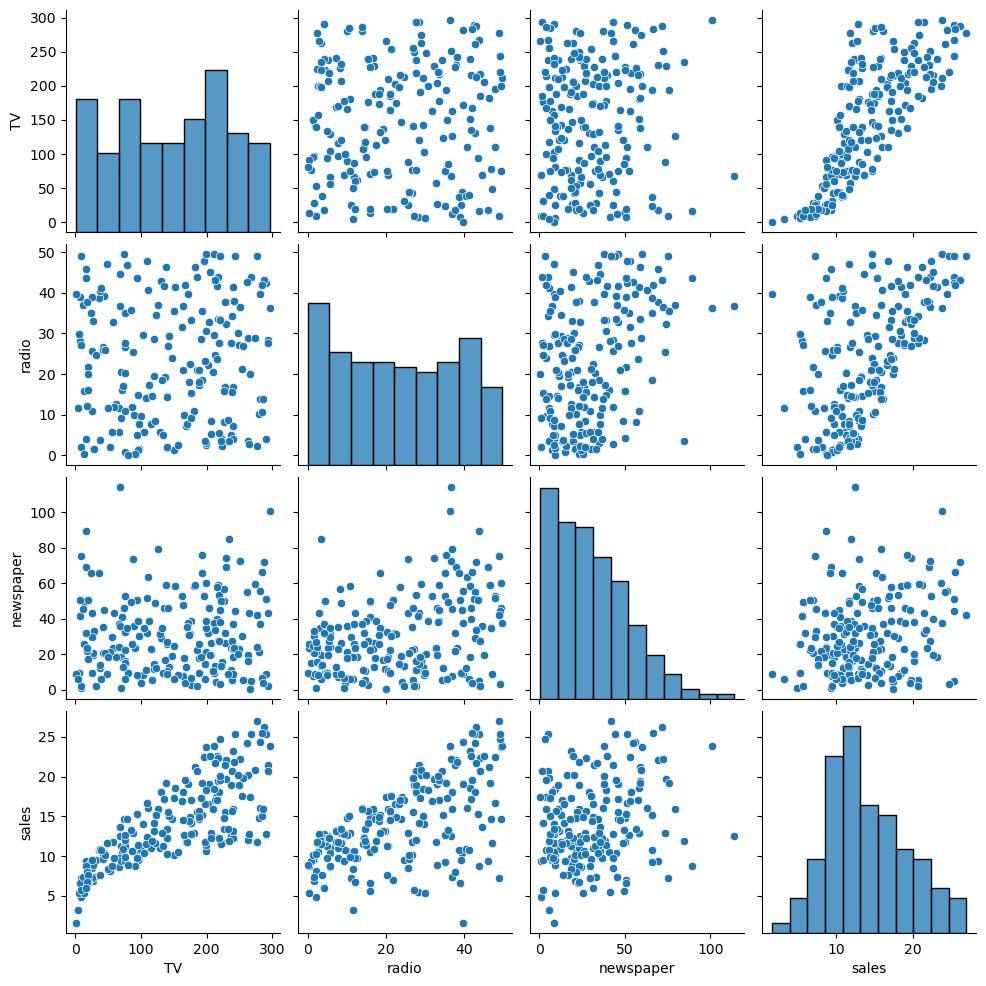

In [20]:
sns.pairplot(df);

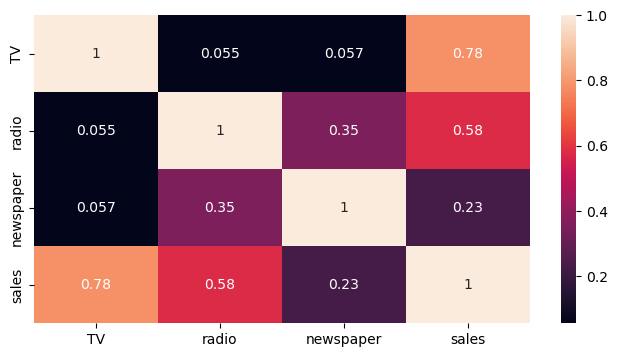

In [21]:
sns.heatmap(df.corr(), annot = True);

In [22]:
from scipy.stats import skew

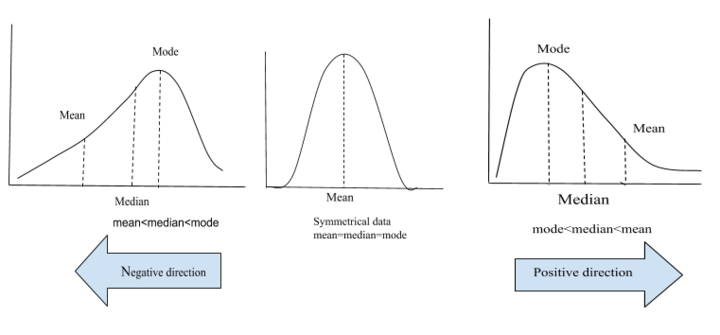

In [23]:
for i in df.drop(columns = 'sales').columns:
    print(i, skew(df[i]))
    
# calculates the skewness of all features except sales column which is our target variable

# negative number in skewness, shows left skewed distribution
# positive number in skewness, shows right skewed distribution
# when skew is close to 0, it is negligible
# when skew is close to 1, it is highly skewed
# for ex: newspaper is right skewed

TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


* For skewness values between -0.5 and +0.5, the distribution can be considered roughly symmetrical

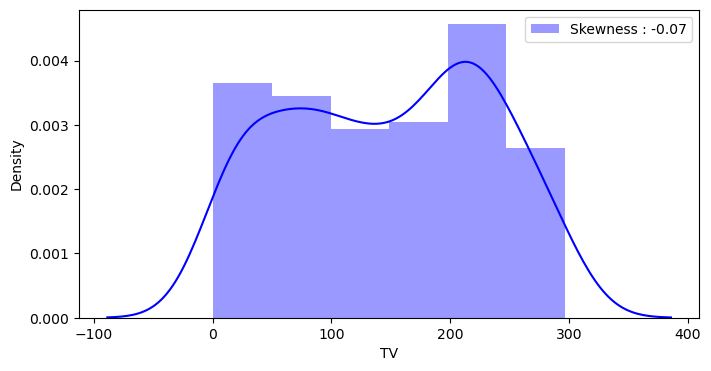

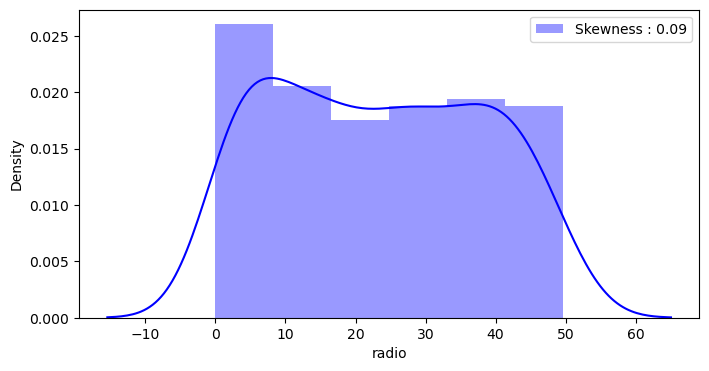

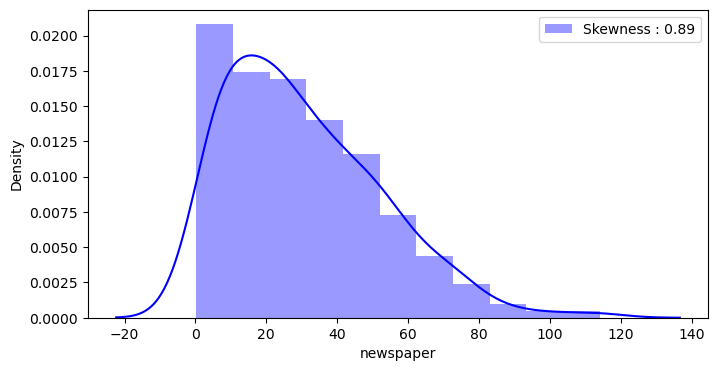

In [24]:
for i in df.drop(columns = 'sales').columns:# selecting all columns except for sales column
    g = sns.distplot(df[i], color = 'b', label = 'Skewness : %.2f'%(df[i].skew()))
    # plotting a distribution plot of data for each column, also creating label shown above the plot
    # and this label contains the skewness value of that column 
    g = g.legend(loc = 'best') # best place tofor the position of label
    plt.show()

In [25]:
df.corr()
# we want the correlation between target variable and columns to be high but not correlation among features
# multi collinearity --> when we have high correlation among features

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


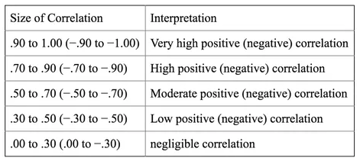

In [26]:
# !pip install ydata-profiling

In [27]:
from ydata_profiling import ProfileReport

In [28]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00, 4010.81it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Train-Test Split

In [29]:
# The library used for ML is Scikit- Learn

# !pip install scikit-learn
# !pip install sklearn

In [30]:
X = df.drop(columns = 'sales') # freatures or input
y = df['sales'] # target variable, or output
print(X, y)

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [31]:
from sklearn.model_selection import train_test_split

X_train: Contains the features of the training dataset.

X_test: Contains the features of the test dataset.

y_train: Contains the labels (labels/targets) of the training dataset.

y_test: Contains the labels (labels/targets) of the test dataset.

train_test_split(X, y, test_size=0.3, random_state=42): This function call randomly splits the datasets X (features) and y (labels) into training and test subsets.

In [32]:
# train_test_split(X, y, test_size=0.3, random_state=42)
# to get the same results, and randomly divide our data into training and test part, we use random state as 42
# so that while dividing our data into train and test, we get same type of split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# test size is 0.3, means 30% of data will be used for testing and 70% for training

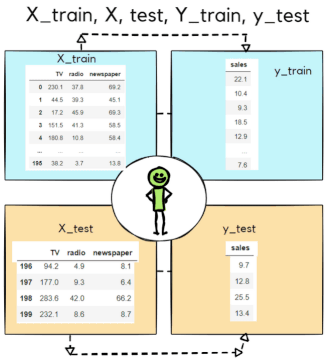

In [34]:
df.sample(20)

,TV,radio,newspaper,sales
191,75.5,10.8,6.0,9.9
23,228.3,16.9,26.2,15.5
7,120.2,19.6,11.6,13.2
194,149.7,35.6,6.0,17.3
58,210.8,49.6,37.7,23.8
128,220.3,49.0,3.2,24.7
54,262.7,28.8,15.9,20.2
45,175.1,22.5,31.5,14.9
159,131.7,18.4,34.6,12.9
64,131.1,42.8,28.9,18.0


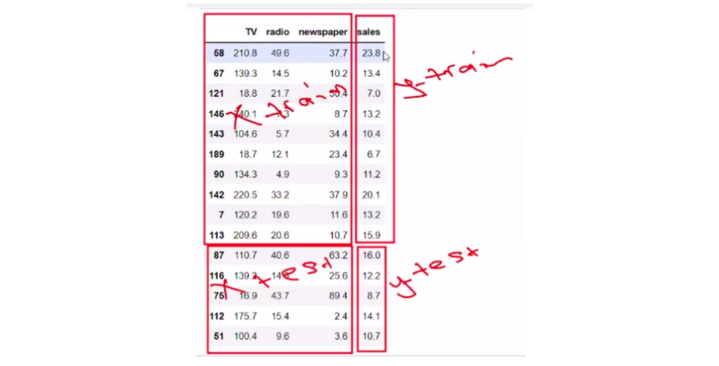

In [35]:
print('X Train features shape: {}\ny Train features shape: {}\nX Test features shape: {}\ny Test features shape: {}'.format
     (X_train.shape, y_train.shape, X_test.shape, y_test.shape))
# just checking the shapes of training and testing dataset

X Train features shape: (140, 3)
y Train features shape: (140,)
X Test features shape: (60, 3)
y Test features shape: (60,)


In [36]:
# print("Train features shape: ", X_train.shape)
# print("Train target shape: ", y_train.shape)
# print("Test features shape: ", X_test.shape)
# print("Test target shape: ", y_test.shape)

In [37]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [38]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

In [39]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [40]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
114    14.6
173    11.7
5       7.2
126     6.6
117     9.4
73     11.0
140    10.9
98     25.4
172     7.6
96     11.7
Name: sales, dtype: float64

# Model Fitting and Compare Actual and Predicted Labels

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression()

In [43]:
model.fit(X_train, y_train)
# model has been trained,
# after this, our model is an equation

LinearRegression()

In [44]:
y_pred = model.predict(X_test)
y_pred
# once model is trained, we can use predict function to make predictions on the test data.

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [45]:
model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [46]:
model.feature_names_in_

array(['TV', 'radio', 'newspaper'], dtype=object)

In [47]:
model.intercept_

2.70894909251591

In [48]:
df.sample(5)

,TV,radio,newspaper,sales
188,286.0,13.9,3.7,15.9
24,62.3,12.6,18.3,9.7
42,293.6,27.7,1.8,20.7
57,136.2,19.2,16.6,13.2
122,224.0,2.4,15.6,11.6


y_pred = b1 * TV + b2 * radio + b3 * newspaper + b0

In [49]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'residual': y_test - y_pred})
comparison

,Actual,Predicted,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


In [50]:
sampl_data = comparison.sample(30)
sampl_data

,Actual,Predicted,residual
150,16.1,18.101136,-2.001136
56,5.5,8.915494,-3.415494
148,10.9,12.496389,-1.596389
15,22.4,21.188228,1.211772
195,7.6,5.224355,2.375645
114,14.6,15.718484,-1.118484
75,8.7,12.777706,-4.077706
60,8.1,5.611980,2.488020
76,6.9,4.381906,2.518094
82,11.3,10.295829,1.004171


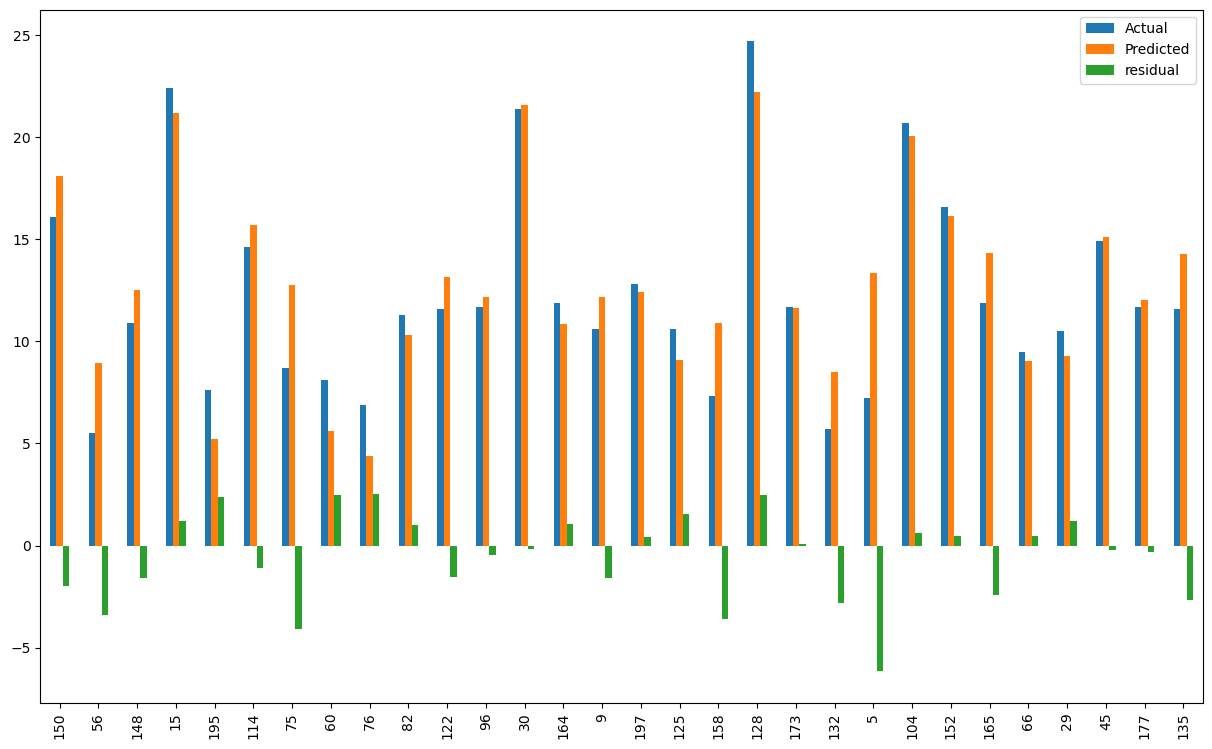

In [51]:
sampl_data.plot(kind = 'bar', figsize = (15, 9));

# Error Metrics

In [52]:
# Let's measure the success of the model

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# importing error metrics for performance evaluation
# we will calculate rmse manually

In [54]:
R2_score = r2_score(y_test, y_pred)
R2_score
# while evaluating ther performance of the trained model, we need to compare the actual test value with the predicted one
# this shows the accuracy of our models prediction of sales 
# TV, Radio, Newspaper are describing 86% of our sales or it's variance

0.8609466508230368

In [55]:
# MAE
mae = mean_absolute_error(y_test, y_pred)
mae
# how much error or mistake my model is making in each prediction

1.5116692224549084

In [56]:
# MSE
mse = mean_squared_error(y_test, y_pred)
mse

3.79679723671522

In [57]:
rmse = np.sqrt(mse)
rmse

# rmse is more sensitive to outliers
# so on average we make 1.94 amount error on each sales prediction

1.9485372043446387

In [58]:
# Average error rate

In [59]:
sales_mean = df['sales'].mean()
sales_mean

14.0225

In [60]:
mae_rate = mae / sales_mean
mae_rate
# it shows that in every prediction, my model is making 10% error

0.10780311802138764

In [61]:
rmse_rate = rmse / sales_mean
rmse_rate

0.138957903679418

An NRMSE (normalized rmse) value of 0.13 indicates that the error of your model is 13% of the average of your sales. This means that your model's predictions are very close to the actual sales values, and this error rate is small compared to the size of your sales.

# Adjusted R2 Score

- n = number of observations (number of data points) 
- p = feature

Adjusted R2 = 1 - [(1 - R2) * (n - 1) / (n - p - 1)]

In [62]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)    #R2 score
    n = df.shape[0]      # number of observations
    p =df.shape[1]-1    # number of indep. variable = feature
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)   
    return adj_r2

In [63]:
adj_r2(y_test, y_pred, df)

0.8588182832335934

In [64]:
# came out close to the previous r2 value. because there were already 3 features.
# let's see the adjusted effect by exaggerating the number of features in the lower example

In [65]:
def adj_r2_2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)    #R2 score
    n = df.shape[0]      # number of observations
    p = 100    # number of indep. variable = feature
    adj_r2_2 = 1 - (1-r2)*(n-1)/(n-p-1)   
    return adj_r2_2

In [66]:
adj_r2_2(y_test, y_pred, df)

0.7204887223614578

1. Adding a Feature with Higher Correlation:

    - When you add a feature that has a strong correlation with the target variable, it generally improves the model’s ability to explain the variance in the target variable.
    - This improvement will be reflected in both the 𝑅2 and the adjusted 𝑅2 scores, but the adjusted 𝑅2 score will increase more significantly as it rewards the addition of meaningful predictors.

2. Adding a Feature with Lower or Weaker Correlation:

    - If you add a feature that has little to no correlation with the target variable, it does not significantly improve the model’s explanatory power.
    - While the 𝑅2  score may still increase slightly (since 𝑅2  never decreases when a new predictor is added), the adjusted 𝑅2  score will penalize this addition. This is because the adjusted 𝑅2  score takes into account the number of predictors and adjusts for the fact that a new predictor should improve themodel's performance. If the new predictor does not, the adjusted 𝑅2  score will decrease.

In summary, the adjusted 𝑅2 score is a more reliable measure when comparing models with different numbers of predictors, as it penalizes the addition of irrelevant or less significant features.

In [67]:
# According to one view, for each added feature, another 10-15 observation lines should be added.
# if number of features are added, so should the number of rows.

# Evaluation Model

In [68]:
# we will make an overall evaluation of the model at this stage.

In [69]:
# calculates all the evaluation metrics together
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print(f"Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [70]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549084
MSE 		: 3.79679723671522
RMSE 		: 1.9485372043446387


In [71]:
# To check the presence of overfitting, we must calculate the train results and compare it with the test values r2 = 0.86

In [72]:
y_train_pred = model.predict(X_train)

In [73]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.158150294807253
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


In [74]:
# Here we will be evaluating overfitting 
# The values 0.90 0.86 are the train and test R2 values...these are very close to each other.

# So we can make an assumption that there isn't any overfitting.

#NOTE: a decision cannot be made based solely on these values

## Residual Plot

In [75]:
residuals = y_test - y_pred

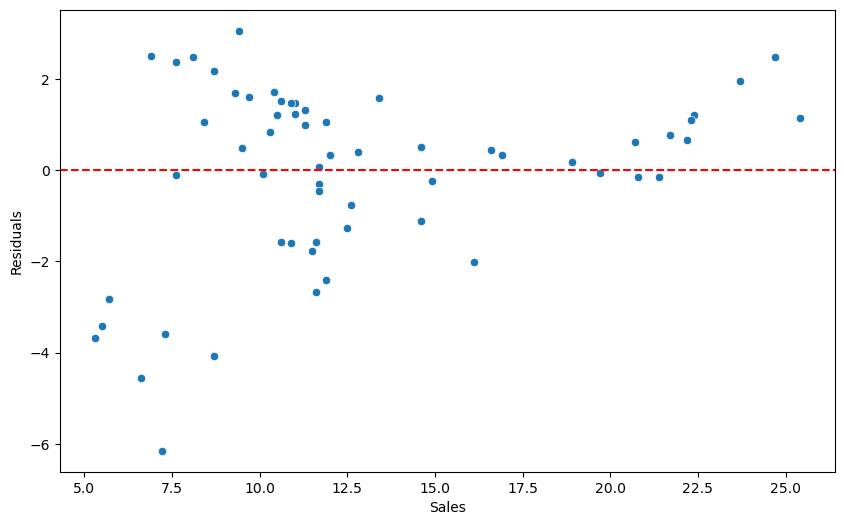

In [76]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x= y_test, y=residuals)
plt.xlabel("Sales")
plt.ylabel("Residuals")
plt.axhline(y=0, color = "r", linestyle ="--" )
plt.show()

In [77]:
# for evaluation of regression - distribution of residual - in order to be able to make a model, the residuals - 
# shouldn't show a pattern.
# pattern in residuals means; it would mean there is a systematic errors, like weighing scale - 

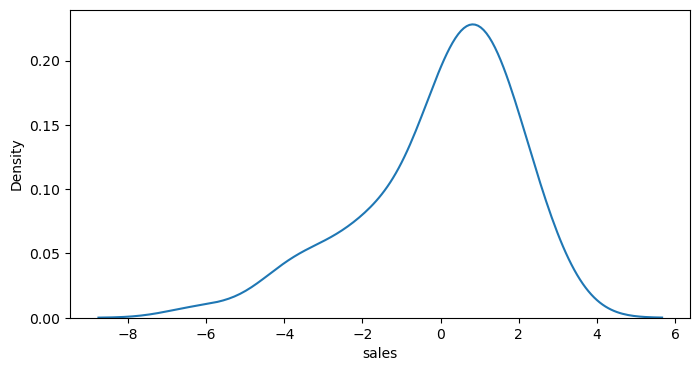

In [78]:
sns.kdeplot(residuals);
# errors distribution should be close to normal distribution, 

In [79]:
# !pip install yellowbrick

In [80]:
from yellowbrick.regressor import ResidualsPlot

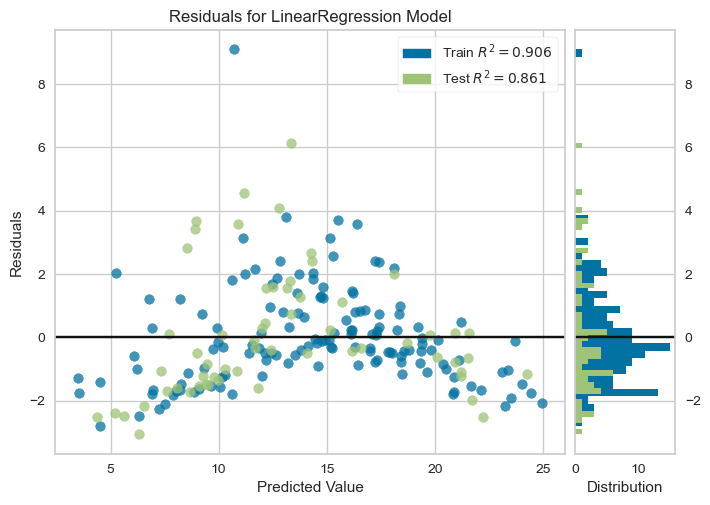

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [81]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()     

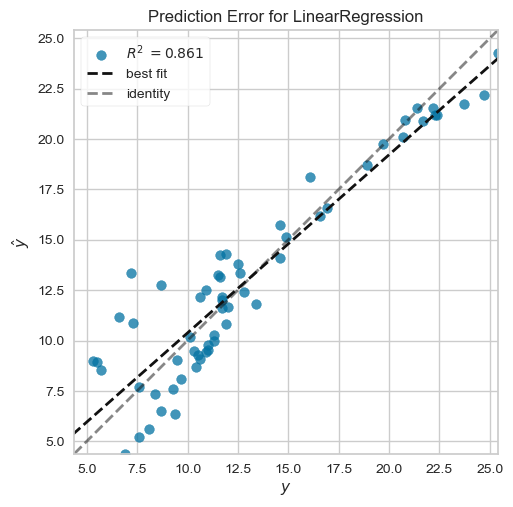

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [82]:
from yellowbrick.regressor import PredictionError
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

1. Identity Line (Dashed Line):

    - This line represents the ideal model where the predicted values (𝑦^) perfectly match the actual values (𝑦).
    - It is a 45-degree diagonal line from the bottom-left to the top-right of the plot.
    - Any point on this line means that the predicted value is almost as equals as the actual value.
    

2. Best Fit Line (Solid Line):
    - This line is derived from the actual predictions of the linear regression model.
    - It shows the relationship between the actual and predicted values.
    - The closer the points are to this line, the better the model is at making predictions.
    - The 𝑅2  value, which is 0.861 in this case, indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An 𝑅2  value close to 1 indicates a good fit.

In the plot, the identity line provides a benchmark for perfect prediction, while the best fit line indicates how well the linear regression model's predictions match the actual data. The scatter points represent individual data points, with their positions showing how much the predictions deviate from the actual values. The 𝑅2  value of 0.861 suggests that the model explains a significant portion of the variance, implying a relatively good fit.

# Final Model

In [83]:
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

In [84]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [85]:
final_model.intercept_

2.9388893694594067

In [86]:
coeff_df = pd.DataFrame(final_model.coef_, index=X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [87]:
df.sample(4)

,TV,radio,newspaper,sales
64,131.1,42.8,28.9,18.0
180,156.6,2.6,8.3,10.5
111,241.7,38.0,23.2,21.8
170,50.0,11.6,18.4,8.4


## Prediction with Final Model

In [88]:
# a sample prediction
advertisement = [[150, 20, 15]]

In [89]:
final_model.predict(advertisement)

array([13.55862413])

In [90]:
sum([150, 20, 15] * final_model.coef_) + final_model.intercept_

13.558624130495994